# <font color=darkgreen>Hackathon | Assignment | eClerx</font>
- Author:<font color=blue>**Vanam Srikanth**</font>
- Email-ID:<font color=blue>** vanam.srikanth0@gmail.com **</font>

### <font color=green>customer experience analysis on twitter data</font>
- To identify the related topics and topic clustering
- To identify identify how many customers are unhappy and why are they unhappy about.

**

### Problem Statement :
Customer support now a days became quick and natural in channels like Twitter and Facebook where uses request for help, support or show their disappointment with larger audience. The data in such channels are Focused , Natural and Succinct. Negative review in such channels can greatly impact the sales, profitability and customer experience.


## Main focus 

Can we do topic clustering to find related topics? Can we improve campaigns run on this social media by this insights?
Can we identify how many customers are unhappy and why are they unhappy about?


### Approach for solving this problem statement

##### In this problem We won't go through predictions of the diffrent labels for the each tweet whether it is going to be +ve, -ve or nutral because the dataset is not labeled and for this purpose we won't apply any kind of deep learning (BERT) and supervised models. Instead, we'll prepare the data just as if it's labeled in order to get a good dataset for example, for predicting automated responses which is broadly used across this kind of services or sentiment analysis and understand how well the customer service attention is performing.
###### I will show how the dataset is composed and then will deep dive into it from the most general to the most specific.

###### In this opportunity we're gonna go through the analysis of the dataset available at https://www.kaggle.com/thoughtvector/customer-support-on-twitter/ which contains several tweets from the customer support service of multiple companies around the globe. Essentially we're going to be focused on how the service is, based on the tweets obviously, how they can be improved in a business scenario and how the client express themselves about the service.

### importing all the necessary libraries for analysis

In [179]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm_notebook
import seaborn
from datetime import datetime
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

##
# library imports
import re
import numpy as np
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
width = 0.75
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.axis('off')
from nltk.corpus import stopwords
from textblob import TextBlob
import scattertext as st
import spacy
#import spacy_cld

import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud

from IPython.display import IFrame
from IPython.core.display import display, HTML
from collections import Counter
from tqdm import tqdm_notebook as tqdm  # cool progress bars
#tqdm().pandas()  # Enable tracking of progress in dataframe `apply` calls

In [103]:
for dirname, _, filenames in os.walk(r'C:\Users\vanam.srikanth\Desktop\kaggle dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\vanam.srikanth\Desktop\kaggle dataset\sample.csv
C:\Users\vanam.srikanth\Desktop\kaggle dataset\twcs\twcs.csv


#### Explaning each aatribute in the Twitter DataSet

##### tweet_id
A unique, anonymized ID for the Tweet. Referenced by response_tweet_id and in_response_to_tweet_id.

##### author_id
A unique, anonymized user ID. @s in the dataset have been replaced with their associated anonymized user ID.

##### inbound
Whether the tweet is "inbound" to a company doing customer support on Twitter. This feature is useful when re-organizing data for training conversational models.

##### created_at
Date and time when the tweet was sent.

##### text
Tweet content. Sensitive information like phone numbers and email addresses are replaced with mask values like __email__.

##### response_tweet_id
IDs of tweets that are responses to this tweet, comma-separated.

##### in_response_to_tweet_id
ID of the tweet this tweet is in response to, if any.


#### step 1 : Pick only inbound tweets that aren't in reply to anything
#### step 2 : Merge in all tweets in response
#### step 3 : Filter out cases where reply tweet isn't from company

In [59]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

tweets_sample = pd.read_csv(r'C:\Users\vanam.srikanth\Desktop\kaggle dataset\sample.csv')
tweets = pd.read_csv(r'C:\Users\vanam.srikanth\Desktop\kaggle dataset\twcs\twcs.csv')

# Pick only inbound tweets that aren't in reply to anything...
first_inbound = tweets[pd.isnull(tweets.in_response_to_tweet_id) & tweets.inbound]
print('Found {} first inbound messages.'.format(len(first_inbound)))

# Merge in all tweets in response
inbounds_and_outbounds = pd.merge(first_inbound, tweets, left_on='tweet_id', 
                                  right_on='in_response_to_tweet_id')
print("Found {} responses.".format(len(inbounds_and_outbounds)))

# Filter out cases where reply tweet isn't from company
inbounds_and_outbounds = inbounds_and_outbounds[inbounds_and_outbounds.inbound_y ^ True]

# Et voila!
print("Found {} responses from companies.".format(len(inbounds_and_outbounds)))
print("Tweets Preview:")
#print(inbounds_and_outbounds)


print((inbounds_and_outbounds['text_y'].str.contains(' DM') | inbounds_and_outbounds['text_y'].str.contains('https://t.co')).sum() / len(inbounds_and_outbounds))

Found 787346 first inbound messages.
Found 875292 responses.
Found 794299 responses from companies.
Tweets Preview:
0.504084733834488


### Since we just want a quick analysis just to see whether the hypothesis is valid and are not very concerned with accuracy, lets use combination of vaderSentiment  and TextBlobSentiment

In [115]:
# Instantiate sentiment analyzer from NLTK, make helper function
sentiment_analyzer = SentimentIntensityAnalyzer()

def sentiment_for(text: str) :
    return sentiment_analyzer.polarity_scores(text)['compound']


0.6696

In [158]:
def sentiment(text):
    return (sentiment_analyzer.polarity_scores(text)["compound"] + TextBlob(text).sentiment.polarity)/2

In [198]:
sentiment('I HATE it!')

-0.8466

In [199]:
sentiment_for('I HATE it!')

-0.6932

In [61]:
# Analyze sentiment of inbound customer support requests
inbounds_and_outbounds['inbound_sentiment'] = \
    inbounds_and_outbounds.text_x.progress_apply(sentiment_for)

In [201]:
inbounds_and_outbounds.head(3)

,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,response_tweet_id_x,in_response_to_tweet_id_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,response_tweet_id_y,in_response_to_tweet_id_y,inbound_sentiment
0,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0,-0.6249
1,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,9,sprintcare,False,Tue Oct 31 21:46:14 +0000 2017,@115712 I would love the chance to review the ...,NaN,8.0,-0.6249
2,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,10,sprintcare,False,Tue Oct 31 21:45:59 +0000 2017,@115712 Hello! We never like our customers to ...,NaN,8.0,-0.6249


In [63]:
author_grouped = inbounds_and_outbounds.groupby('author_id_y')

In [105]:
support_services = inbounds_and_outbounds['author_id_y'].value_counts()

In [204]:
inbounds_and_outbounds['author_id_y'].value_counts().head(15)

AmazonHelp         84637
AppleSupport       74632
Uber_Support       40029
Delta              28485
SpotifyCares       26940
Tesco              24887
AmericanAir        24506
comcastcares       23841
SouthwestAir       20986
TMobileHelp        20065
British_Airways    19611
Ask_Spectrum       17270
VirginTrains       14357
UPSHelp            14293
hulu_support       14194
Name: author_id_y, dtype: int64

In [106]:
support_services.sort_index(ascending=False,inplace=True)

In [107]:
support_services = support_services[:108]

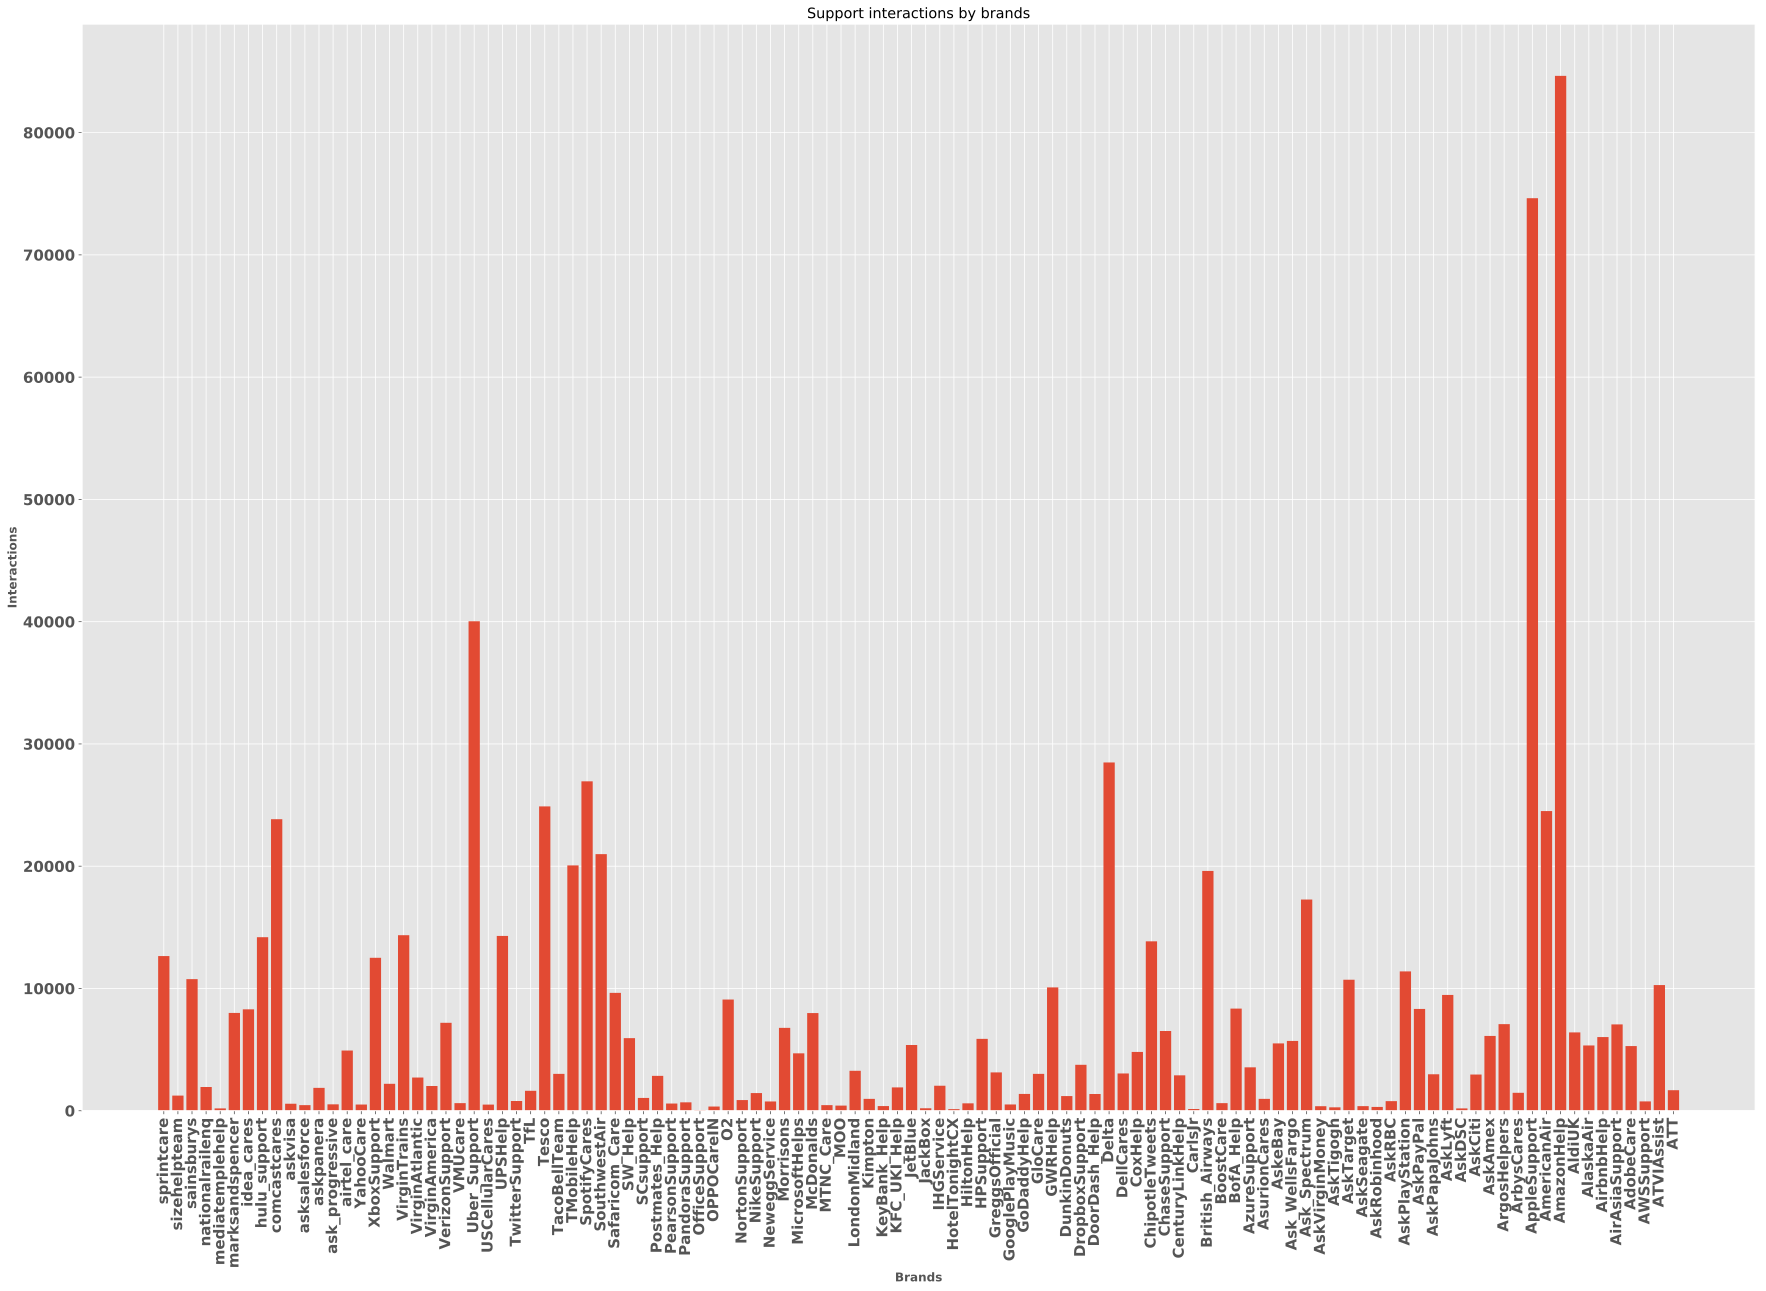

In [203]:
%matplotlib inline

plt.figure(figsize=(30,20))
plt.title('Support interactions by brands')
plt.xlabel('Brands')
plt.ylabel('Interactions')
plt.bar(list(support_services.index.values),list(support_services.values))
plt.xticks(rotation=90)
plt.show()

In [116]:
top_support_providers = set(author_grouped.agg('count')
                                .sort_values(['tweet_id_x'], ascending=[0])
                                .index[:25]
                                .values)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  """Entry point for launching an IPython kernel.


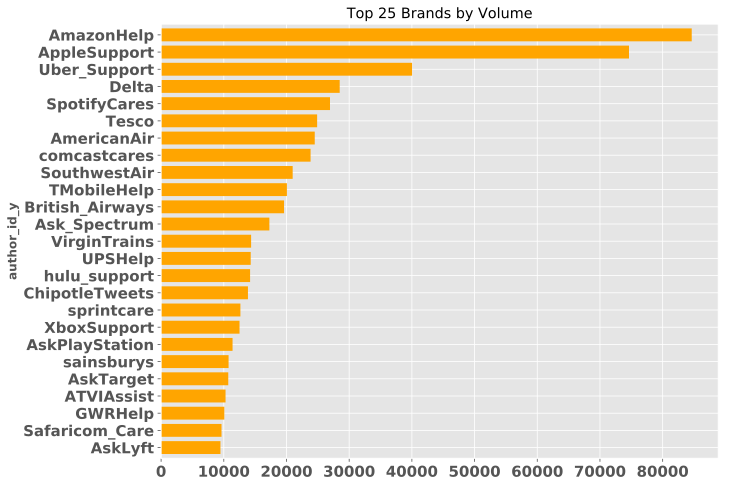

In [118]:
inbounds_and_outbounds \
    .loc[inbounds_and_outbounds.author_id_y.isin(top_support_providers)] \
    .groupby('author_id_y') \
    .tweet_id_x.count() \
    .sort_values() \
    .plot('barh', title='Top 25 Brands by Volume',figsize=(10, 8), color='orange', zorder=2, width=width)

#### The following 15 Companies having the most number of tweets in the given DataSet
    AmazonHelp         84637
    AppleSupport       74632
    Uber_Support       40029
    Delta              28485
    SpotifyCares       26940
    Tesco              24887
    AmericanAir        24506
    comcastcares       23841
    SouthwestAir       20986
    TMobileHelp        20065
    British_Airways    19611
    Ask_Spectrum       17270
    VirginTrains       14357
    UPSHelp            14293
    hulu_support       14194

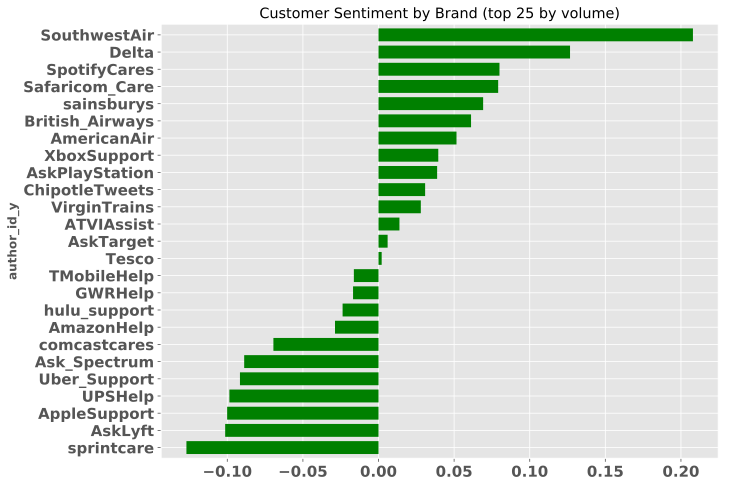

In [97]:
inbounds_and_outbounds \
    .loc[inbounds_and_outbounds.author_id_y.isin(top_support_providers)] \
    .groupby('author_id_y') \
    .inbound_sentiment.mean() \
    .sort_values() \
    .plot(kind='barh', title='Customer Sentiment by Brand (top 25 by volume)',figsize=(10, 8), color='green', zorder=2, width=width)

### In the Above Graph it clearly showing that "Sprintcare,AskLyft and AppleSupport" having the most avg of Negative reviews.

   #### For further Analysis i am considering AppleSupport because it having second most tweets and having Negative tweet polarity avg -0.10, Here Sprintcare is having highest Negative Polarity Avg but having less number of records compare to the Apple.
   
making sure the dataframe contains only the needed columns for further analysis, To increase the code performance by avoiding unnecessary columumns

In [81]:
#making sure the dataframe contains only the needed columns
QnR = inbounds_and_outbounds[["author_id_x","created_at_x","text_x","author_id_y","created_at_y","text_y"]]
QnR.head(5)

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y
0,115712,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...
1,115712,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare,Tue Oct 31 21:46:14 +0000 2017,@115712 I would love the chance to review the ...
2,115712,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare,Tue Oct 31 21:45:59 +0000 2017,@115712 Hello! We never like our customers to ...
3,115713,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,sprintcare,Tue Oct 31 19:59:13 +0000 2017,@115713 H there! We'd definitely like to work ...
4,115715,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",sprintcare,Tue Oct 31 22:10:10 +0000 2017,@115715 Please send me a private message so th...


In [89]:
# removing anonymized screen names 
def sn_replace(match):
    _sn = match.group(2).lower()
    if not _sn.isnumeric():
        # This is a company screen name
        return match.group(1) + match.group(2)
    return ''

sn_re = re.compile('(\W@|^@)([a-zA-Z0-9_]+)')
print("Removing anonymized screen names in X...")
QnR["text_x"] = QnR.text_x.progress_apply(lambda txt: sn_re.sub(sn_replace, txt))
print("Removing anonymized screen names in Y...")
QnR["text_y"] = QnR.text_y.progress_apply(lambda txt: sn_re.sub(sn_replace, txt))

Removing anonymized screen names in X...



Removing anonymized screen names in Y...


In [133]:
amazonQnR = QnR[QnR["author_id_y"]=="AmazonHelp"]

In [120]:
AppleQnR = QnR[QnR["author_id_y"]=="AppleSupport"]

In [124]:
AppleQnR

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y
874767,823505,Tue Nov 21 15:47:10 +0000 2017,iOS 11.2 shame on battery @AppleSupport,AppleSupport,Tue Nov 21 16:10:00 +0000 2017,We understand how important battery life is o...
874768,823506,Tue Nov 21 15:50:37 +0000 2017,@AppleSupport quickquestion. My iphone literal...,AppleSupport,Tue Nov 21 16:07:08 +0000 2017,Thanks for reaching out. We know how importa...
874841,332603,Tue Nov 21 17:50:02 +0000 2017,just to let you know I received these emails ...,AppleSupport,Tue Nov 21 18:03:51 +0000 2017,Thanks for bringing this to our attention. We...
874897,823583,Tue Nov 21 18:47:15 +0000 2017,"If you have not upgraded to High Sierra, then ...",AppleSupport,Tue Nov 21 18:53:26 +0000 2017,This isn't something we would expect after a ...
874948,485591,Tue Nov 21 19:30:24 +0000 2017,"im so upset over this update, every time I hav...",AppleSupport,Tue Nov 21 19:38:00 +0000 2017,We completely understand being upset about yo...
874969,548726,Tue Nov 21 20:21:07 +0000 2017,@AppleSupport my iPhone X crashed and now keep...,AppleSupport,Tue Nov 21 20:41:28 +0000 2017,Hey there! Thank you for reaching out for sup...
874970,823636,Tue Nov 21 20:13:09 +0000 2017,@AppleSupport my #iphone7plus black dead scree...,AppleSupport,Tue Nov 21 20:30:03 +0000 2017,We want to make sure your iPhone 7 Plus is wo...
874981,823645,Tue Nov 21 20:37:10 +0000 2017,Why is my phone unsaving contacts @AppleSuppor...,AppleSupport,Tue Nov 21 21:10:30 +0000 2017,We know how easy contacts make it to quickly ...
875001,823661,Tue Nov 21 21:35:48 +0000 2017,I'm trying to understand how @AppleSupport tol...,AppleSupport,Tue Nov 21 22:03:00 +0000 2017,We're here for you. Let us know in DM what's ...
875025,823679,Tue Nov 21 22:39:39 +0000 2017,why is it whenever a new iphone gets launched...,AppleSupport,Tue Nov 21 22:50:00 +0000 2017,Thanks for reaching out. We know how importan...


In [134]:
AppleQnR["text_x"] = AppleQnR["text_x"].str.encode("utf-8")
AppleQnR["text_x"] = AppleQnR["text_x"].apply(str)

amazonQnR["text_x"] = amazonQnR["text_x"].str.encode("utf-8")
amazonQnR["text_x"] = amazonQnR["text_x"].apply(str)

## We are going to use Scattertext to compare Negative Tweets vs Positive Tweets of Apple
Scattertext is an excellent exploratory text analysis tool, which I would never have stumbled on if not for spacy! It allows cool visualisations differentiating between the terms used by different documents using an interactive scatter plot.

Let's build one to compare between Negative Tweets vs Positive Tweets

In [152]:
import scattertext as st
nlp = spacy.load('en',disable_pipes=["tagger","ner"])
AppleQnR['parsed'] = AppleQnR.text_y.progress_apply(nlp)

In [160]:
AppleQnR["text_x_sentiment"] = AppleQnR["text_x"].apply(sentiment)

## Since we just want a quick analysis just to see whether the hypothesis is valid and are not very concerned with accuracy, lets use combination of vaderSentiment and TextBlobSentiment

### Here i am calculating the sentiment of tweet by taking avg of vaderSentiment and TextBlobSentiment

#### Here i am considering Negative polarity tweets as Negative and Zero and above polarity Tweets as Positive Tweets

In [163]:
def clasify_sentiment(polarity_value):
    
    if  polarity_value <0:
        return 'Negative'
    elif polarity_value>=0:
        return 'Positive'
#     else:
#         return 'Neutral'

In [165]:
AppleQnR["text_x_sentiment_type"] = AppleQnR["text_x_sentiment"].apply(clasify_sentiment)

In [206]:
AppleQnR.head()

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y,parsed,text_x_sentiment,text_x_sentiment_type
119,115856,Tue Oct 31 22:19:32 +0000 2017,"b""b'Hey @AppleSupport and anyone else who upgr...",AppleSupport,Tue Oct 31 22:26:29 +0000 2017,"Hey, let's work together to figure out what's...","( , Hey, ,, let, 's, work, together, to, figur...",0.00000,Positive
120,115857,Tue Oct 31 22:01:50 +0000 2017,"b""b'Tf is wrong with my keyboard'""",AppleSupport,Tue Oct 31 22:05:00 +0000 2017,"Fill us in on what is happening, then we can ...","( , Fill, us, in, on, what, is, happening, ,, ...",-0.48835,Negative
121,115859,Tue Oct 31 22:11:16 +0000 2017,"b""b' @AppleSupport hello are all the lines clo...",AppleSupport,Tue Oct 31 22:17:30 +0000 2017,What's going on? We're hapy to help if we can...,"( , What, 's, going, on, ?, We, 're, hapy, to,...",-0.05000,Negative
122,115861,Tue Oct 31 20:46:35 +0000 2017,"b""b'Hello, internet. Can someone explain why t...",AppleSupport,Tue Oct 31 20:55:34 +0000 2017,You're in the right place; we'll do all we ca...,"( , You, 're, in, the, right, place, ;, we, 'l...",0.00000,Positive
123,115863,Tue Oct 31 22:16:40 +0000 2017,"b""b'@AppleSupport I\\xe2\\x80\\x99ve got a scr...",AppleSupport,Tue Oct 31 22:22:31 +0000 2017,Go ahead and send us a DM please. Let us know...,"( , Go, ahead, and, send, us, a, DM, please, ....",0.00000,Positive


### Creating Corpus for the making ScatterPlot

In [167]:
corpus = st.CorpusFromParsedDocuments(AppleQnR,
                             category_col='text_x_sentiment_type',
                             parsed_col='parsed').build()

In [181]:
html = st.produce_scattertext_explorer(corpus,
          category='Negative',
           category_name='Negative',
           not_category_name='Positive',
          width_in_pixels=600,
          minimum_term_frequency=10,
          term_significance = st.LogOddsRatioUninformativeDirichletPrior()
          )

In [182]:
#uncomment this cell to load the interactive scattertext visualisation
filename = "Negitive-vs-Positive reviews Apple tweets.html"
open(filename, 'wb').write(html.encode('utf-8'))
IFrame(src=filename, width = 800, height=700)

## The Above ScattertextPlot clearly showing

### <font color=red>Negative Tweets Summary</font>
### The words like "Certainity not, Going to, haven't, Here more, haven't got, fix for,hate" are very frequent in the Negative reviews which are present in the negative side of graph with high frequent postions

### <font color=Green>Positive Tweets Summary</font>
### The words like "happy, Gift, fast, Special, similar, good" are very frequent in the Positive reviews which are present in the Positive side of graph with high frequent postions

### <font color=Blue>In this Report i haven't remove the Stopwords and most frequent words to keep the entire tweet as it is original for showing in the ScatterTestPlot without stemming and Lemmetization  </font>

## Visualising Empath topics and categories
Empath is a lexical analysis research project at Stanford for Understanding Topic Signals in Large-Scale Text. Read more about it from this research paper.

Scattertext has an option for visualising Empath topics and categories, lets use that for Negitive-vs-Positive reviews Apple tweets

In [184]:
feat_builder = st.FeatsFromOnlyEmpath()
empath_corpus = st.CorpusFromParsedDocuments(AppleQnR,
                                              category_col='text_x_sentiment_type',
                                              feats_from_spacy_doc=feat_builder,
                                              parsed_col='parsed').build()

In [185]:
empath_corpus_html = st.produce_scattertext_explorer(empath_corpus,
                                        category='Negative',
                                        category_name='Negative',
                                        not_category_name='Positive',
                                        width_in_pixels=700,
                                        metadata=AppleQnR['text_x_sentiment_type'],
                                        use_non_text_features=True,
                                        use_full_doc=True,
                                        topic_model_term_lists=feat_builder.get_top_model_term_lists())

In [186]:
# uncomment this cell to load the interactive scattertext visualisation
filename = "Negitive-vs-Positive reviews Apple tweets from empath_corpus.html"
open(filename, 'wb').write(empath_corpus_html.encode('utf-8'))
IFrame(src=filename, width = 900, height=700)

## The Above ScattertextPlot clearly showing

### <font color=red>Negative Tweets Summary</font>
### The words like "weapon,hate,emotional,exasperation,irritability,anger,hiking,rage" are very frequent in the Negative reviews which are present in the negative side of graph with high frequent postions

### <font color=Green>Positive Tweets Summary</font>
### The words like "happy, attractive,beauty,hipster,home,domestic_work,shopping, fast, Special, good" are very frequent in the Positive reviews which are present in the Positive side of graph with high frequent postions

### <font color=Blue>In this Report i haven't remove the Stopwords and most frequent words to keep the entire tweet as it is original for showing in the ScatterTestPlot without stemming and Lemmetization  </font>

## Traditional method

Using the NLTK for cleaning the text data and show the popular words in the WordCloud

In [188]:
AppleQnR.text_x_sentiment_type.value_counts()

Positive    39088
Negative    35544
Name: text_x_sentiment_type, dtype: int64

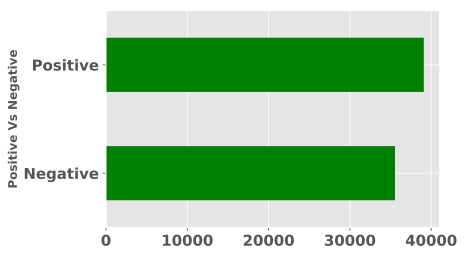

In [196]:
c=AppleQnR.groupby("text_x_sentiment_type")['text_x_sentiment'].count().plot(kind='barh', color='green')
c.set_ylabel('Positive Vs Negative')
plt.show()

In [207]:
AppleQnR


,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y,parsed,text_x_sentiment,text_x_sentiment_type
119,115856,Tue Oct 31 22:19:32 +0000 2017,"b""b'Hey @AppleSupport and anyone else who upgr...",AppleSupport,Tue Oct 31 22:26:29 +0000 2017,"Hey, let's work together to figure out what's...","( , Hey, ,, let, 's, work, together, to, figur...",0.000000,Positive
120,115857,Tue Oct 31 22:01:50 +0000 2017,"b""b'Tf is wrong with my keyboard'""",AppleSupport,Tue Oct 31 22:05:00 +0000 2017,"Fill us in on what is happening, then we can ...","( , Fill, us, in, on, what, is, happening, ,, ...",-0.488350,Negative
121,115859,Tue Oct 31 22:11:16 +0000 2017,"b""b' @AppleSupport hello are all the lines clo...",AppleSupport,Tue Oct 31 22:17:30 +0000 2017,What's going on? We're hapy to help if we can...,"( , What, 's, going, on, ?, We, 're, hapy, to,...",-0.050000,Negative
122,115861,Tue Oct 31 20:46:35 +0000 2017,"b""b'Hello, internet. Can someone explain why t...",AppleSupport,Tue Oct 31 20:55:34 +0000 2017,You're in the right place; we'll do all we ca...,"( , You, 're, in, the, right, place, ;, we, 'l...",0.000000,Positive
123,115863,Tue Oct 31 22:16:40 +0000 2017,"b""b'@AppleSupport I\\xe2\\x80\\x99ve got a scr...",AppleSupport,Tue Oct 31 22:22:31 +0000 2017,Go ahead and send us a DM please. Let us know...,"( , Go, ahead, and, send, us, a, DM, please, ....",0.000000,Positive
...,...,...,...,...,...,...,...,...,...
875110,823737,Wed Nov 22 00:48:54 +0000 2017,"b""b'anyone having issues with #osx #HighSierra...",AppleSupport,Wed Nov 22 01:02:29 +0000 2017,We're happy to help out with your concerns. T...,"( , We, 're, happy, to, help, out, with, your,...",-0.154375,Negative
875147,689907,Wed Nov 22 02:11:43 +0000 2017,"b""b'Hey @AppleSupport - not being able to dupl...",AppleSupport,Wed Nov 22 02:33:58 +0000 2017,We're certainly glad to get you pointed in th...,"( , We, 're, certainly, glad, to, get, you, po...",-0.334600,Negative
875148,823765,Wed Nov 22 02:17:14 +0000 2017,"b""b'Yo @AppleSupport is that weird glitch w/ t...",AppleSupport,Wed Nov 22 02:29:26 +0000 2017,We'd love to help! Which device are you using...,"( , We, 'd, love, to, help, !, Which, device, ...",-0.255617,Negative
875171,823779,Wed Nov 22 03:24:02 +0000 2017,"b""b'What the fuck @AppleSupport my phone keep...",AppleSupport,Wed Nov 22 03:27:30 +0000 2017,We'd like to help. Send us a DM and we can st...,"( , We, 'd, like, to, help, ., Send, us, a, DM...",-0.471150,Negative


### Separating the Negative tweets For finding most popular words used by customers

In [211]:
AppleQnR_negative = AppleQnR[AppleQnR['text_x_sentiment_type']=='Negative']

In [215]:
AppleQnR_negative.head()

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y,parsed,text_x_sentiment,text_x_sentiment_type
120,115857,Tue Oct 31 22:01:50 +0000 2017,"b""b'Tf is wrong with my keyboard'""",AppleSupport,Tue Oct 31 22:05:00 +0000 2017,"Fill us in on what is happening, then we can ...","( , Fill, us, in, on, what, is, happening, ,, ...",-0.48835,Negative
121,115859,Tue Oct 31 22:11:16 +0000 2017,"b""b' @AppleSupport hello are all the lines clo...",AppleSupport,Tue Oct 31 22:17:30 +0000 2017,What's going on? We're hapy to help if we can...,"( , What, 's, going, on, ?, We, 're, hapy, to,...",-0.05000,Negative
129,115869,Tue Oct 31 22:10:06 +0000 2017,"b""b'Hey! Last time I downloaded an update my f...",AppleSupport,Tue Oct 31 22:16:31 +0000 2017,We're here to help. Meet us in DM and we can ...,"( , We, 're, here, to, help, ., Meet, us, in, ...",-0.41340,Negative
130,115870,Tue Oct 31 18:20:46 +0000 2017,"b""b'After update #ios1103 no spotify on my loc...",AppleSupport,Tue Oct 31 18:33:00 +0000 2017,Thanks for reaching out to us. Are you experi...,"( , Thanks, for, reaching, out, to, us, ., Are...",-0.14800,Negative
131,115871,Tue Oct 31 22:08:32 +0000 2017,"b""b'I just need to do something about the batt...",AppleSupport,Tue Oct 31 22:15:00 +0000 2017,We want to help you get your battery life bac...,"( , We, want, to, help, you, get, your, batter...",-0.33060,Negative


In [217]:
AppleQnR_negative_tweets['AppleNegativeTweets'] = AppleQnR_negative['text_x']

In [218]:
AppleQnR_negative_tweets.shape

(35545,)

In [219]:
AppleQnR_negative_tweets.head()

120                   b"b'Tf is wrong with my keyboard'"
121    b"b' @AppleSupport hello are all the lines clo...
129    b"b'Hey! Last time I downloaded an update my f...
130    b"b'After update #ios1103 no spotify on my loc...
131    b"b'I just need to do something about the batt...
Name: text_x, dtype: object

## Normalizing the data

### Some of the common text preprocessing / cleaning steps are:

    Lower casing
    Removal of Punctuations
    Removal of Stopwords
    Removal of Frequent words
    Removal of Rare words
    Stemming
    Lemmatization
    Removal of emojis
    Removal of emoticons
    Conversion of emoticons to words
    Conversion of emojis to words
    Removal of URLs
    Removal of HTML tags
    Chat words conversion
    Spelling correction
So these are the different types of text preprocessing steps which we can do on text data. But we need not do all of these all the times. We need to carefully choose the preprocessing steps based on our use case since that also play an important role.

For example, in sentiment analysis use case, we need not remove the emojis or emoticons as it will convey some important information about the sentiment. Similarly we need to decide based on our use cases.

#### Lower Casing
Lower casing is a common text preprocessing technique. The idea is to convert the input text into same casing format so that 'text', 'Text' and 'TEXT' are treated the same way.

In [220]:
AppleQnR_negative_tweets['AppleNegativeTweets'] = AppleQnR_negative_tweets['AppleNegativeTweets'].str.lower()

#### Removal of Punctuations and stopwords
One another common text preprocessing technique is to remove the punctuations from the text data. This is again a text standardization process that will help to treat 'hurray' and 'hurray!' in the same way.

We also need to carefully choose the list of punctuations to exclude depending on the use case. For example, the string.punctuation in python contains the following punctuation symbols

!"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~`

We can add or remove more punctuations as per our need.

In [223]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

AppleQnR_negative_tweets['AppleNegativeTweets'] = AppleQnR_negative_tweets['AppleNegativeTweets'].apply(lambda text: remove_punctuation(str(text)))

In [224]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

AppleQnR_negative_tweets['AppleNegativeTweets'] = AppleQnR_negative_tweets['AppleNegativeTweets'].apply(lambda text: remove_stopwords(text))

#### Lemmatization
Lemmatization is similar to stemming in reducing inflected words to their word stem but differs in the way that it makes sure the root word (also called as lemma) belongs to the language.

As a result, this one is generally slower than stemming process. So depending on the speed requirement, we can choose to use either stemming or lemmatization.

Let us use the WordNetLemmatizer in nltk to lemmatize our sentences

In [228]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
def Lemmatizer(data):
    lemmatizer = WordNetLemmatizer()
    
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + lemmatizer.lemmatize(w)
    return new_text

AppleQnR_negative_tweets['AppleNegativeTweets'] = AppleQnR_negative_tweets['AppleNegativeTweets'].apply(lambda text: Lemmatizer(text))

#### Removal of URLs
Next preprocessing step is to remove any URLs present in the data. For example, if we are doing a twitter analysis, then there is a good chance that the tweet will have some URL in it. Probably we might need to remove them for our further analysis.

We can use the below code snippet to do that.

In [233]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)


In [234]:
AppleQnR_negative_tweets['AppleNegativeTweets']= AppleQnR_negative_tweets['AppleNegativeTweets'].apply(lambda text: remove_urls(text))

In [236]:
counter = Counter()
for text in AppleQnR_negative_tweets['AppleNegativeTweets'].values:
    for word in text.split():
        counter[word] += 1
        

## Words Cloud

## What are the Chase customers tweeting about?

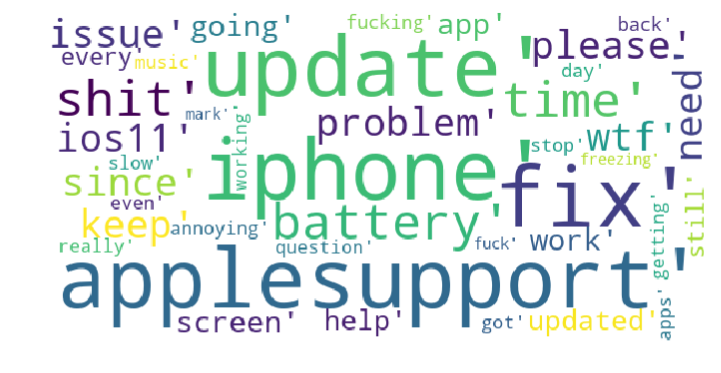

In [288]:
comment_words = '' 

for val in counter.most_common(40):     
    val = str(val) 
    tokens = val.split() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 600,height = 300,background_color ='white',min_font_size = 4).generate(comment_words) 
                    
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## Conclusions
##### Even when the data is not labeled, we can see above what are the words and topics more discussed in the customer service at Twitter. In this problem i didn't go through predictions of the diffrent labels for the each tweet whether it is going to be +ve, -ve or nutral because the dataset is not labeled and for this purpose we won't apply any kind of deep learning (BERT) and supervised models. Instead, we'll prepare the data just as if it's labeled in order to get a good dataset for example, for predicting automated responses which is broadly used across this kind of services or sentiment analysis and understand how well the customer service attention is performing.


### Since we just want a quick analysis just to see whether the hypothesis is valid, So i have used combination of vaderSentiment and TextBlobSentiment

### Here i calculated the sentiment of tweet by taking avg of vaderSentiment and TextBlobSentiment

#### Here i considered Negative value polarity tweets as Negative and Zero and above polarity Tweets as Positive Tweets


I have choose AppleSupport Tweets because it had most negative avg polarity as well as 2nd most number of tweets in the whole DataSet. 

The ScatterPlot and WordClouds are clearly showing, what are the keywords are mostley used by customers in the Negative Tweets.

Most people are facing issues while using Applle products with respect to there Battery, Bluetooth,Screen, IOS11 and App related issues. So they are using inappropriate words while conveying there problems in the form of tweets.

